In [57]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# File name
filename = "output_training.txt"

# Containers
episodes = []
rewards = []
avg_rewards = []
best_rewards = []
best_avg_rewards = []
steps = []
epsilons = []
ep_times = []
avg100_times = []
total_times = []

In [59]:
pattern = re.compile(
    r"Episode\s+(\d+)\s+\| Reward:\s+([-\d.]+)\s+\| Avg\(100\):\s+([-\d.]+)\s+\| "
    r"Epsilon:\s+([-\d.]+)\s+\| Best Avg Reward:\s+([-\d.inf]+)\s+\| "
    r"Best Reward:\s+([-\d.]+)\s+\| Steps:\s+(\d+)\s+\| Ep Time:\s+([-\d.]+)s\s+\| "
    r"Avg100 Time:\s+([-\d.]+)s\s+\| Total Time:\s+([-\d.]+)m"
)


In [60]:
# Read and parse file
with open(filename, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            ep, r, avg_r, eps, best_avg_r, best_r, st, ep_time, avg100_time, total_time = match.groups()
            episodes.append(int(ep))
            rewards.append(float(r))
            avg_rewards.append(float(avg_r))
            epsilons.append(float(eps))
            best_avg_rewards.append(float(best_avg_r))
            best_rewards.append(float(best_r))
            steps.append(int(st))
            ep_times.append(float(ep_time))
            avg100_times.append(float(avg100_time))
            total_times.append(float(total_time) / 60)  # convert minutes to hours

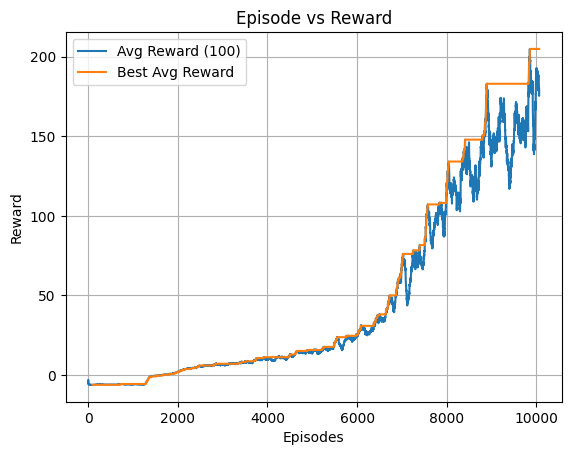

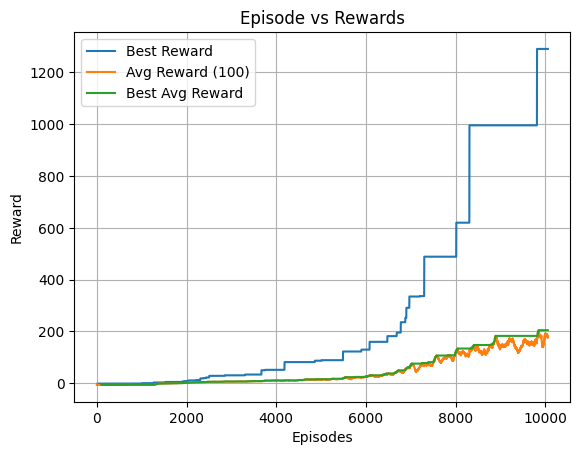

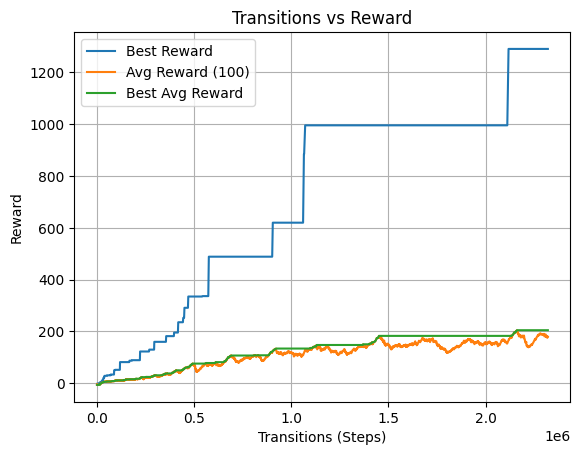

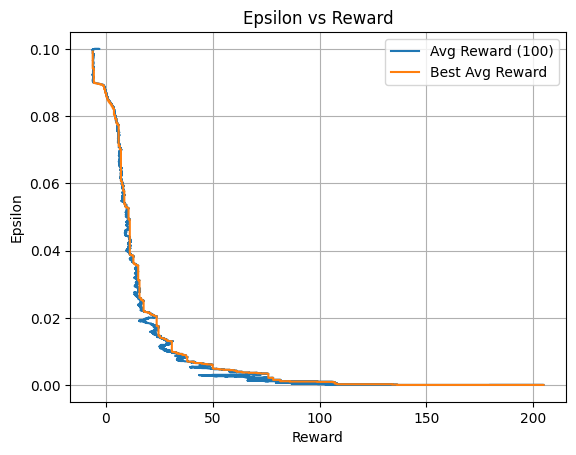

In [61]:
# ---------- Plot 1: Episode vs Reward ----------
plt.figure()
plt.plot(episodes, avg_rewards, label="Avg Reward (100)")
plt.plot(episodes, best_avg_rewards, label="Best Avg Reward")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Episode vs Reward")
plt.legend()
plt.grid(True)

# ---------- Plot 1: Episode vs Reward ----------
plt.figure()
plt.plot(episodes, best_rewards , label="Best Reward")
plt.plot(episodes, avg_rewards, label="Avg Reward (100)")
plt.plot(episodes, best_avg_rewards, label="Best Avg Reward")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Episode vs Rewards")
plt.legend()
plt.grid(True)



# ---------- Plot 2: Transitions (Steps) vs Reward ----------
plt.figure()
plt.plot(steps, best_rewards, label="Best Reward")
plt.plot(steps, avg_rewards, label="Avg Reward (100)")
plt.plot(steps, best_avg_rewards, label="Best Avg Reward")
plt.xlabel("Transitions (Steps)")
plt.ylabel("Reward")
plt.title("Transitions vs Reward")
plt.legend()
plt.grid(True)

# ---------- Plot 3: Epsilon vs Reward ----------
plt.figure()
plt.plot(avg_rewards, epsilons, label="Avg Reward (100)")
plt.plot(best_avg_rewards, epsilons, label="Best Avg Reward")
plt.xlabel("Reward")
plt.ylabel("Epsilon")
plt.title("Epsilon vs Reward")
plt.legend()
plt.grid(True)


# Show all plots
plt.show()

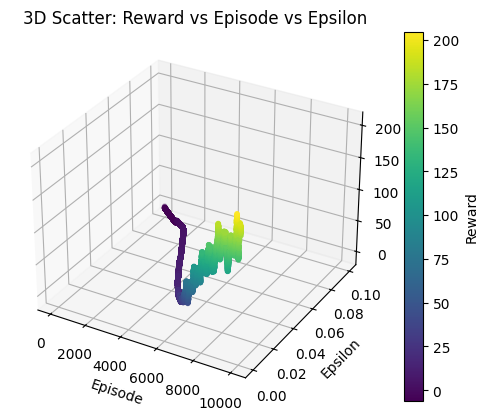

In [62]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    episodes,
    epsilons,
    avg_rewards,
    c=avg_rewards,
    cmap="viridis",
    s=10
)

ax.set_xlabel("Episode")
ax.set_ylabel("Epsilon")
ax.set_zlabel("Reward")
ax.set_title("3D Scatter: Reward vs Episode vs Epsilon")

fig.colorbar(sc, ax=ax, label="Reward")
plt.show()


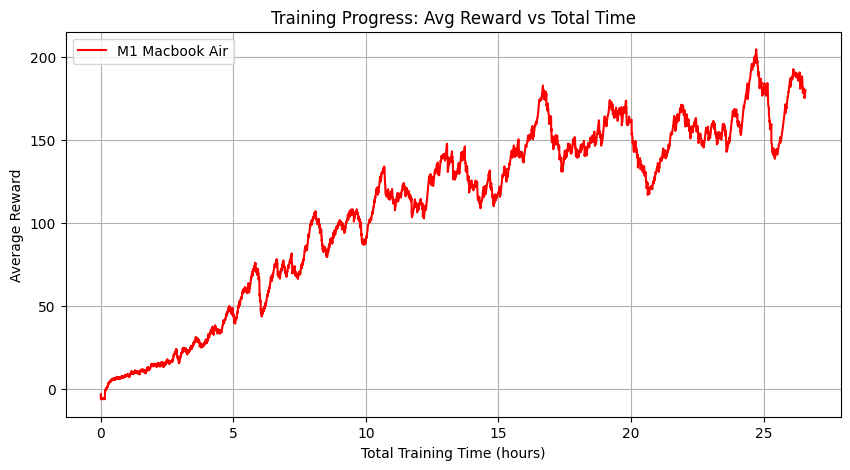

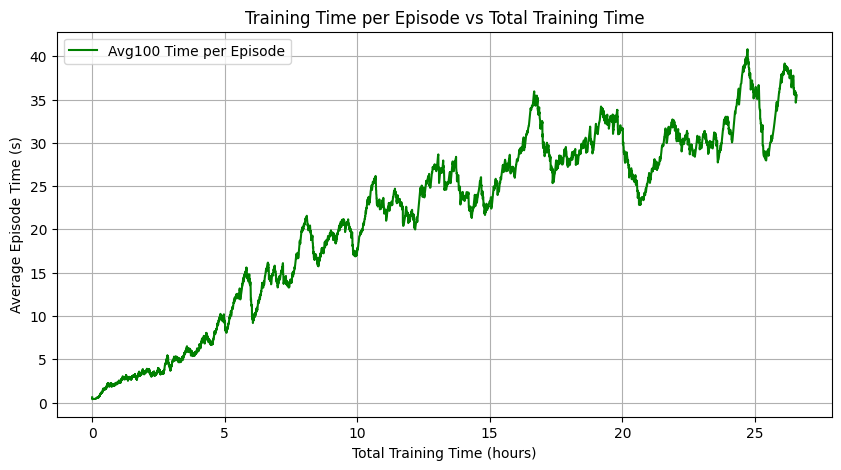

In [63]:
# Plot Total Time vs Avg Reward
plt.figure(figsize=(10,5))
plt.plot(total_times, avg_rewards, label="M1 Macbook Air", color='red')
plt.xlabel("Total Training Time (hours)")
plt.ylabel("Average Reward")
plt.title("Training Progress: Avg Reward vs Total Time")
plt.grid(True)
plt.legend()
plt.show()

# Plot Total Time vs Avg100 Time
plt.figure(figsize=(10,5))
plt.plot(total_times, avg100_times, label="Avg100 Time per Episode", color='green')
plt.xlabel("Total Training Time (hours)")
plt.ylabel("Average Episode Time (s)")
plt.title("Training Time per Episode vs Total Training Time")
plt.grid(True)
plt.legend()
plt.show()
